## Homework_7

In [1]:
import numpy as np

In [2]:
from math import sqrt

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [3]:
# Произвести расчет с использованием intercept

In [4]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

In [5]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [6]:
b = (np.mean(X*y)-np.mean(X)*np.mean(y))/(np.mean(X**2) - np.mean(X)**2)
b

2.620538882402765

In [7]:
n = len(X)
n

10

In [8]:
b = (n*(np.sum(X*y)) - (np.sum(X) * np.sum(y)))/(n*(np.sum(X**2))-((np.sum(X)**2)))
b

2.6205388824027653

In [9]:
a = np.mean(y) - b*np.mean(X)
a

444.17735732435955

In [10]:
y_hat = 444.18 + 2.621*X
y_hat

array([535.915, 562.125, 942.17 , 968.38 , 549.02 , 627.65 , 585.714,
       837.33 , 758.7  , 732.49 ])

In [11]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [12]:
mse=((y-y_hat)**2).sum()/n
mse

6470.417384600003

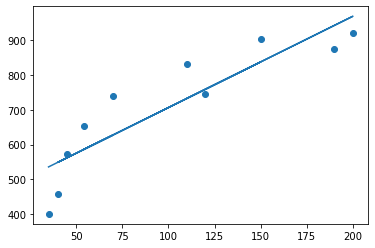

In [13]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.scatter(X,y) 
plt.plot(X,444.18 + 2.621*X)
plt.show()

In [14]:
# Произвести расчет без использования intercept

In [15]:
import seaborn as sns

In [16]:
len(X)

10

In [17]:
X = X.reshape((len(X),1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [18]:
y = y.reshape((len(X),1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [19]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@y)
B

array([[5.88982042]])

In [20]:
y_hat = B*X
y_hat

array([[ 206.1437147 ],
       [ 265.04191891],
       [1119.06587983],
       [1177.96408403],
       [ 235.59281681],
       [ 412.28742941],
       [ 318.05030269],
       [ 883.47306302],
       [ 706.77845042],
       [ 647.88024621]])

In [21]:
mse=((y-y_hat)**2).sum()/n
mse

56516.8584157194

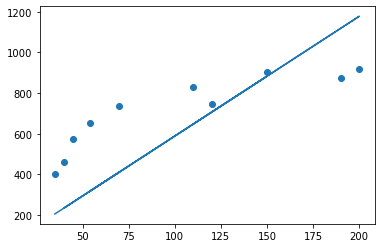

In [22]:
%matplotlib inline
plt.scatter(X,y) 
plt.plot(X,5.88982*X)
plt.show()

2.	Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [23]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

In [24]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [25]:
def mse_(B1,y=y,X=X,n=len(X)): 
    return np.sum((B1*X-y)**2)/n

In [26]:
alpha = 1e-6
alpha

1e-06

In [27]:
B1 = 0.1

In [28]:
n = len(X)

In [29]:
for i in range (700):
    B1 -= alpha*(2/n)*np.sum((B1*X-y)*X)
    if i%50==0:
        print('Iteration: {i}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteration: 0, B1=0.25952808, mse=493237.7212546963
Iteration: 50, B1=4.497229618367758, mse=83233.94472982832
Iteration: 100, B1=5.54537842245223, mse=58151.31823171113
Iteration: 150, B1=5.804626485478126, mse=56616.849068093856
Iteration: 200, B1=5.868748638669329, mse=56522.97550129376
Iteration: 250, B1=5.884608547059329, mse=56517.232638059555
Iteration: 300, B1=5.888531320728348, mse=56516.88130936019
Iteration: 350, B1=5.889501575592372, mse=56516.85981627392
Iteration: 400, B1=5.8897415574471985, mse=56516.85850140053
Iteration: 450, B1=5.889800914315978, mse=56516.858420961085
Iteration: 500, B1=5.889815595583751, mse=56516.858416040064
Iteration: 550, B1=5.889819226833643, mse=56516.858415739014
Iteration: 600, B1=5.889820124983314, mse=56516.85841572062
Iteration: 650, B1=5.889820347130743, mse=56516.858415719485


In [30]:
mse_(5.8898202)

56516.858415720075

3.	В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, когда известна сигма - среднеквадрати́ческое отклоне́ние.

Для вычисления доверительных интервалов и проверки статистических гипотез используется таблица критических точек распределения Стьюдента, когда неизвестна сигма - среднеквадрати́ческое отклоне́ние

*4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [31]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

In [32]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [33]:
def mse_(A1,B1,y=y,X=X,n=len(X)): 
    return np.sum(((A1+B1*X)-y)**2)/n

In [34]:
alpha = 5e-5
alpha

5e-05

In [35]:
B1 = 0.1

In [36]:
A1 = 500

In [37]:
n = len(X)

In [38]:
for i in range (500000):
    A1 -= alpha*(2/n)*np.sum((A1+B1*X-y))
    B1 -= alpha*(2/n)*np.sum((A1+B1*X-y)*X)
    if i%1000==0:
        print('Iteration: {i}, A1={A1}, B1={B1} mse={mse}'.format(i=i, A1=A1, B1=B1, mse=mse_(A1, B1)))

Iteration: 0, A1=500.019976, B1=3.00620144336 mse=16005.466685508876
Iteration: 1000, A1=498.61549705893424, B1=2.2198602691977465 mse=7222.1529672268925
Iteration: 2000, A1=497.25191504810823, B1=2.2298965810877736 mse=7184.965087635523
Iteration: 3000, A1=495.92248842740577, B1=2.239681500582416 mse=7149.616860927507
Iteration: 4000, A1=494.6263616628982, B1=2.249221324629911 mse=7116.017281033979
Iteration: 5000, A1=493.3627006503157, B1=2.2585221924507346 mse=7084.079843879192
Iteration: 6000, A1=492.130692178268, B1=2.267590089488432 mse=7053.722324670666
Iteration: 7000, A1=490.9295434049141, B1=2.276430851261463 mse=7024.8665662067015
Iteration: 8000, A1=489.7584813477422, B1=2.2850501671185524 mse=6997.438277656132
Iteration: 9000, A1=488.6167523861253, B1=2.2934535839000065 mse=6971.366843292238
Iteration: 10000, A1=487.5036217763426, B1=2.301646509507281 mse=6946.585140688496
Iteration: 11000, A1=486.41837317874126, B1=2.309634216383191 mse=6923.029367907872
Iteration: 12000,

Iteration: 98000, A1=448.82534247967055, B1=2.586328524456888 mse=6475.894318537905
Iteration: 99000, A1=448.70891842522485, B1=2.587185435235001 mse=6475.623221776928
Iteration: 100000, A1=448.5954105936165, B1=2.588020881868161 mse=6475.365535942937
Iteration: 101000, A1=448.484745938465, B1=2.5888354019963855 mse=6475.120597608747
Iteration: 102000, A1=448.37685324307705, B1=2.5896295197927284 mse=6474.887776166333
Iteration: 103000, A1=448.2716630746182, B1=2.5904037463005842 mse=6474.66647220335
Iteration: 104000, A1=448.16910773942345, B1=2.5911585797626198 mse=6474.456115959833
Iteration: 105000, A1=448.06912123943965, B1=2.591894505941363 mse=6474.25616586139
Iteration: 106000, A1=447.9716392297518, B1=2.5926119984318223 mse=6474.066107124841
Iteration: 107000, A1=447.87659897717526, B1=2.593311518966262 mse=6473.885450432904
Iteration: 108000, A1=447.7839393198815, B1=2.5939935177113616 mse=6473.713730674387
Iteration: 109000, A1=447.69360062804407, B1=2.5946584335578735 mse=6

Iteration: 194000, A1=444.58440293963, B1=2.617542922705521 mse=6470.45622993467
Iteration: 195000, A1=444.574207145261, B1=2.6176179663563186 mse=6470.4541508076345
Iteration: 196000, A1=444.5642667380499, B1=2.6176911302924015 mse=6470.452174533253
Iteration: 197000, A1=444.5545753209859, B1=2.6177624615974047 mse=6470.450296023486
Iteration: 198000, A1=444.54512665729396, B1=2.617832006175584 mse=6470.448510442006
Iteration: 199000, A1=444.53591466641785, B1=2.617899808781388 mse=6470.446813191728
Iteration: 200000, A1=444.5269334201095, B1=2.617965913048235 mse=6470.445199902983
Iteration: 201000, A1=444.5181771386145, B1=2.618030361516595 mse=6470.4436664222685
Iteration: 202000, A1=444.50964018694975, B1=2.618093195661382 mse=6470.442208801546
Iteration: 203000, A1=444.50131707127906, B1=2.6181544559186345 mse=6470.4408232880805
Iteration: 204000, A1=444.49320243537676, B1=2.618214181711541 mse=6470.439506314791
Iteration: 205000, A1=444.4852910571832, B1=2.618272411475794 mse=64

Iteration: 291000, A1=444.2121113035852, B1=2.620283084238696 mse=6470.414507563048
Iteration: 292000, A1=444.211240776027, B1=2.620289491543877 mse=6470.414492406371
Iteration: 293000, A1=444.21039205368976, B1=2.6202957383570626 mse=6470.414477999485
Iteration: 294000, A1=444.2095645903923, B1=2.620301828698285 mse=6470.414464305299
Iteration: 295000, A1=444.20875785363074, B1=2.6203077664869086 mse=6470.414451288549
Iteration: 296000, A1=444.2079713242412, B1=2.620313555544114 mse=6470.414438915719
Iteration: 297000, A1=444.20720449606284, B1=2.620319199595372 mse=6470.414427154972
Iteration: 298000, A1=444.20645687561563, B1=2.6203247022728235 mse=6470.41441597602
Iteration: 299000, A1=444.2057279817783, B1=2.620330067117642 mse=6470.414405350073
Iteration: 300000, A1=444.20501734548077, B1=2.620335297582305 mse=6470.414395249786
Iteration: 301000, A1=444.2043245094029, B1=2.6203403970328045 mse=6470.41438564916
Iteration: 302000, A1=444.20364902768, B1=2.6203453687508187 mse=6470.

Iteration: 387000, A1=444.1804008914943, B1=2.6205164809712564 mse=6470.414203526432
Iteration: 388000, A1=444.18032465535947, B1=2.620517042088681 mse=6470.414203410191
Iteration: 389000, A1=444.18025032880877, B1=2.620517589151079 mse=6470.414203299701
Iteration: 390000, A1=444.1801778640108, B1=2.6205181225105014 mse=6470.414203194678
Iteration: 391000, A1=444.18010721433143, B1=2.6205186425101874 mse=6470.414203094848
Iteration: 392000, A1=444.18003833430515, B1=2.620519149484774 mse=6470.414202999958
Iteration: 393000, A1=444.1799711796043, B1=2.620519643760525 mse=6470.414202909761
Iteration: 394000, A1=444.1799057070139, B1=2.6205201256555135 mse=6470.414202824023
Iteration: 395000, A1=444.17984187440015, B1=2.6205205954798556 mse=6470.4142027425305
Iteration: 396000, A1=444.17977964068433, B1=2.6205210535359 mse=6470.414202665065
Iteration: 397000, A1=444.1797189658166, B1=2.6205215001184237 mse=6470.414202591435
Iteration: 398000, A1=444.1796598107497, B1=2.6205219355148257 ms

Iteration: 485000, A1=444.1776106781761, B1=2.6205370176539633 mse=6470.414201192938
Iteration: 486000, A1=444.17760433209804, B1=2.620537064362719 mse=6470.414201192138
Iteration: 487000, A1=444.17759814497776, B1=2.6205371099015045 mse=6470.414201191369
Iteration: 488000, A1=444.1775921128348, B1=2.6205371542996176 mse=6470.414201190639
Iteration: 489000, A1=444.17758623178605, B1=2.620537197585638 mse=6470.414201189951
Iteration: 490000, A1=444.1775804980478, B1=2.6205372397874167 mse=6470.414201189294
Iteration: 491000, A1=444.17757490793025, B1=2.6205372809321092 mse=6470.414201188667
Iteration: 492000, A1=444.17756945783486, B1=2.6205373210462035 mse=6470.414201188073
Iteration: 493000, A1=444.17756414425486, B1=2.62053736015551 mse=6470.414201187512
Iteration: 494000, A1=444.1775589637712, B1=2.6205373982851925 mse=6470.414201186974
Iteration: 495000, A1=444.1775539130499, B1=2.6205374354597915 mse=6470.414201186462
Iteration: 496000, A1=444.1775489888403, B1=2.620537471703232 m

In [39]:
mse_(444.1775, 2.620538)

6470.414201182209